# House Price Prediction with Linear Regression

![](https://i.imgur.com/3sw1fY9.jpg)

Here in this notebook, I am going to predict the price of a house using information like its location, area, no. of rooms etc. The data set is taken from kaggle. I will follow these steps to train the model.
- Download and Explore the Data
- Prepare the Dataset for Training
- Train a Linear Regression Model
- Make Prediction and Evaluate the model

In [ ]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets --quiet

## Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [4]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'

I will use `urlretrive` function from the module `urllib.request` to download the dataset.

In [3]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(dataset_url, 'house-price.zip')

('house-price.zip', <http.client.HTTPMessage at 0x1cceb21b0d0>)

In [6]:
from zipfile import ZipFile

In [7]:
with ZipFile('house-price.zip') as f:
    f.extractall(path='house-prices')

In [8]:
import os


In [9]:
data_dir = 'house-prices'

In [10]:
os.listdir(data_dir)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [11]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'house-prices/train.csv'

In [12]:
price_df =pd.read_csv(train_csv_path)
price_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

Let's explore the columns and data types within the dataset.

In [13]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 Number of rows and columns contain by the dataset

In [14]:
n_rows = price_df.shape[0]

In [15]:
n_cols = price_df.shape[1]

In [16]:
print('The dataset contains {} rows and {} columns.' .format(n_rows, n_cols))

The dataset contains 1460 rows and 81 columns.


In [17]:
price_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Step 2 -Exploratory Analysis and Visualization 

Here to explore the data by visualizing the distribution of values in some of values in some columns of the dataset and relationship between "Charges" and other columns,  Matplotlib, Seaborn and Plotly labraries will used. 

In [18]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

These following settings will improve the defult style and font size for the graphs

In [19]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_7820\2205326210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price_df['SalePrice']);


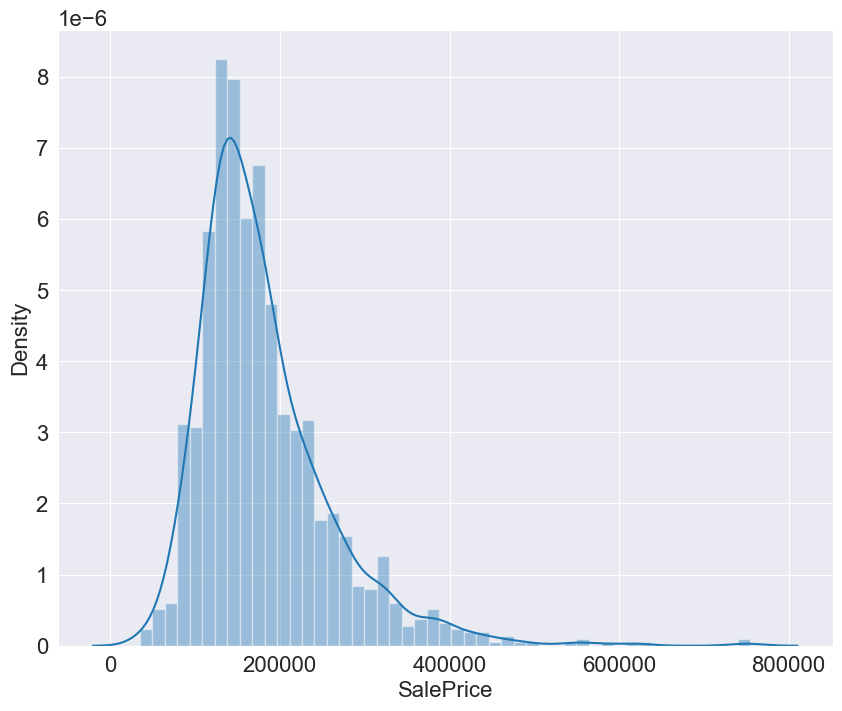

In [20]:
sns.distplot(price_df['SalePrice']);

#### Relationship with numerical variables

In [ ]:
var = 'GrLivArea'
data = pd.concat([price_df['SalePrice'], price_df[var]], axis =1)
data.plot.scatter(x= var, y='SalePrice', ylim=(0,800000));

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([price_df['SalePrice'], price_df[var]], axis =1)
data.plot.scatter(x= var, y='SalePrice', ylim=(0,800000));

#### Relationship with categorical features

In [ ]:
var = 'OverallQual'
data = pd.concat([price_df['SalePrice'], price_df[var]], axis= 1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax= 800000);

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(price_df[cols], size = 2.5)
plt.show();

## Step 3 - Prepare the Dataset for Training

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.

#### Identify Inputs and Targets

While the dataset contains 81 columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

In [21]:
price_df[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

Correlation Martix to facilitate selecting features

In [22]:
dropColumns=['Alley','FireplaceQu','PoolQc','Fence','MiscFeature','TotalBsmtSF','TotRmsAbvGrd', 'YearBuilt','GarageArea']
nprice_df =price_df.loc[:, ~price_df.columns.isin(dropColumns)]

In [23]:
dropColumns2=['YrSold','MoSold','MiscVal','3SsnPorch','BsmtHalfBath','LowQualFinSF','BsmtFinSF2','OverallCond','MSSubClass']
nprice_df=nprice_df.loc[:, ~nprice_df.columns.isin(dropColumns2)] 

After Droping the columns due to the low correlations

In [24]:
nprice_df.columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [25]:
price_df.drop(['Id'], axis=1, inplace=True)

In [32]:
# Identify the input columns (a list of column names)
input_cols = list(nprice_df.columns)[1:-1]

In [27]:
# Identify the name of the target column (a single string, not a list)
target_col = 'SalePrice'

In [33]:
print(list(input_cols))

['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'SaleType', 'SaleCondition']


In [34]:
len(input_cols)

62

In [30]:
print(target_col)

SalePrice


In [35]:
inputs_df = price_df[input_cols].copy()

In [36]:
targets = price_df[target_col]

#### Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.


In [37]:
import numpy as np

In [38]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [39]:
categorical_cols = inputs_df.select_dtypes('object').columns.tolist()

In [40]:
print(list(numeric_cols))

['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea']


In [41]:
print(list(categorical_cols))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']


In [42]:
inputs_df[categorical_cols].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
SaleType          9
SaleCondition     6
dtype: int64

#### Impute Numerical Data

Some of the numeric columns in our dataset contain missing values (`nan`).

In [43]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Machine learning models can't work with missing data. The process of filling missing values is called [imputation](https://scikit-learn.org/stable/modules/impute.html).

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [44]:
from sklearn.impute import SimpleImputer

Impute (fill) missing values in the numeric columns of `inputs_df` using a `SimpleImputer`. 


In [45]:
imputer = SimpleImputer(strategy = 'mean')

In [46]:
price_df[numeric_cols].isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtUnfSF          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
PoolArea           0
dtype: int64

In [47]:
#Fit the imputer to the numeric colums
imputer.fit(price_df[numeric_cols])

SimpleImputer()

In [48]:
# Transform and replace the numeric columns

inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

After imputation, none of the numeric columns should contain any missing values.

In [49]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

#### Scale Numerical Values

The numeric columns in our dataset have varying ranges. 

In [50]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
min,21.0,1300.0,1.0,1950.0,0.0,0.0,0.0,334.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0
max,313.0,215245.0,10.0,2010.0,1600.0,5644.0,2336.0,4692.0,2065.0,5642.0,3.0,3.0,2.0,8.0,3.0,3.0,2010.0,4.0,857.0,547.0,552.0,480.0,738.0


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Create the scaler
scaler = MinMaxScaler()

In [53]:
# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

MinMaxScaler()

In [54]:
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

After scaling, the ranges of all numeric columns should be $(0, 1)$.

In [55]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Encode Categorical Columns

Our dataset contains several categorical columns, each with a different number of categories.



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

 Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category


In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [58]:
# 2. Fit the encoder to the categorical colums
encoder.fit(inputs_df[categorical_cols])

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [59]:
inputs_df[categorical_cols].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
SaleType          9
SaleCondition     6
dtype: int64

In [60]:
# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
len(encoded_cols)

248

In [61]:
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_7820\2384708245.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_7820\2384708245.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_7820\2384708245.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

The new one-hot category columns should now be added to `inputs_df`.

In [62]:
inputs_df

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.883333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.122500,Gd,TA,PConc,Gd,TA,No,GLQ,0.125089,Unf,0.064212,GasA,Ex,Y,SBrkr,0.119780,0.413559,0.259231,0.333333,0.666667,0.5,0.375,0.333333,Gd,Typ,0.000000,Attchd,0.936364,RFn,0.50,TA,TA,Y,0.000000,0.111517,0.000000,0.0,0.0,NaN,WD,Normal,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.555556,0.433333,Gable,CompShg,MetalSd,MetalSd,NaN,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.173281,Unf,0.121575,GasA,Ex,Y,SBrkr,0.212942,0.000000,0.174830,0.000000

#### Training and Validation Set

Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers. 

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [65]:
train_inputs

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,...,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1023,0.075342,0.008797,0.666667,0.933333,0.008750,0.002835,0.569349,0.268472,0.000000,0.220422,0.000000,0.666667,0.0,0.250,0.333333,0.333333,0.954545,0.50,0.182030,0.036563,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [66]:
train_targets

1023    191000
810     181000
1384    105000
626     139900
813     157900
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64

In [67]:
val_inputs

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,...,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.167808,0.033252,0.555556,0.883333,0.000000,0.117470,0.169521,0.168426,0.000000,0.138282,0.000000,0.333333,0.0,0.375,0.333333,0.000000,0.572727,0.25,0.224037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1

In [68]:
val_targets

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
988     195000
243     120000
1342    228500
1057    248000
1418    124000
Name: SalePrice, Length: 365, dtype: int64

## Step 3 - Train a Linear Regression Model

We're now ready to train the model. Linear regression is a commonly used technique for solving [regression problems](https://jovian.ai/aakashns/python-sklearn-logistic-regression/v/66#C6). In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Here's a visual summary of how a linear regression model is structured:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

However, linear regression doesn't generalize very well when we have a large number of input columns with co-linearity i.e. when the values one column are highly correlated with values in other column(s). This is because it tries to fit the training data perfectly. 

Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. 

Create and train a linear regression model using the `Ridge` class from `sklearn.linear_model`.

In [69]:
from sklearn.linear_model import Ridge

In [70]:
# Create the model
model = Ridge(alpha=1.0)

In [71]:
# Fit the model using inputs and targets
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

Ridge()

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

In [72]:
print(model.intercept_)

-44943.568608839996


## Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

Generate predictions and compute the RMSE loss for the training and validation sets. 
 


In [ ]:
from sklearn.metrics import mean_squared_error

In [74]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]


In [75]:
train_preds = model.predict(X_train)

In [76]:
train_preds

array([173005.35877706, 181096.36576078, 105192.9766386 , ...,
       114423.07084577, 179533.9799032 , 187466.26140002])

In [77]:
train_targets

1023    191000
810     181000
1384    105000
626     139900
813     157900
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64

In [80]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [81]:
train_rmse = rmse(train_targets, train_preds)

In [82]:
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 22491.229124149326.


In [84]:
val_preds = model.predict(X_val)

In [85]:
val_preds

array([147485.75931556, 340697.25001637,  88931.0243314 , 185435.97644525,
       335969.03830307,  65527.11660884, 239336.83481072, 149510.25994659,
        58580.33644519, 130783.98701476, 149238.28298312, 109530.8331765 ,
        94152.07874819, 225782.14552117, 170114.70828195, 125974.93093264,
       191443.26167387, 121987.33394468, 127294.06812279, 211239.65920536,
       166972.49674012, 207248.03585437, 178753.98431598, 129959.8036842 ,
       204460.04681627, 140443.86212068, 206428.1888941 , 111274.69938696,
       170121.06003667, 206671.04904305, 136746.66976183, 275061.64825308,
       222640.67957827, 106461.58512994, 245967.59610049, 147456.55311331,
       144803.59837175, 206993.6356648 , 301822.34314239, 117515.23712689,
       130416.99939395, 231631.9292376 , 102127.15951795, 354292.25824203,
       140143.23372353, 164769.00414287,  97411.92769746, 124061.28219254,
       420337.31089478, 132888.1669145 , 112074.79689251, 250689.8152504 ,
        99553.46322496, 2

In [86]:
val_rmse = rmse(val_targets, val_preds)

In [87]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 28952.547577268153.


#### Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

 Identify the weights (or coefficients) assigned to for different features by the model.


In [88]:
weights = model.coef_

Let's create a dataframe to view the weight assigned to each column.

In [89]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [90]:
weights_df

,columns,weight
9,GrLivArea,93758.989083
7,1stFlrSF,81655.223139
252,PoolQC_Ex,75859.514183
2,OverallQual,69310.960102
8,2ndFlrSF,65807.030391
...,...,...
14,KitchenAbvGr,-23550.316449
243,GarageCond_Ex,-23884.756430
254,PoolQC_Gd,-68349.073115
86,Condition2_PosN,-87965.338923


Can you tell which columns have the greatest impact on the price of the house?

#### Making Predictions

The model can be used to make predictions on new inputs using the following helper function:

In [91]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)[0]

In [93]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [94]:
predicted_price = predict_input(sample_input)

C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_7820\599193421.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_7820\599193421.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(

In [95]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $121894.26393172354


#### Saving the model

Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [96]:
import joblib

In [97]:
house_price_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [98]:
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']